In [1]:
import sys
sys.path.append('../utils/')
sys.path.append('../paviaUTools/')
# sys.path.insert(1, '../utils')
# sys.path.insert(2, '../paviaUTools')

import matplotlib.pyplot as plt
from datasetLoader import datasetLoader
import os
import numpy as np
from whole_pipeline import whole_pipeline_all, whole_pipeline_divided, whole_pipeline_divided_parallel
import torch
from plots import *
from weights_anal import *
from MetaLearner import HDDOnBands
from consts import *
from HDD_HDE import HDD_HDE


import gc

torch.cuda.empty_cache()
gc.collect()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

parent_dir = os.path.join(os.getcwd(),"..")
csv_path = os.path.join(parent_dir, 'datasets', 'paviaU.csv')
gt_path = os.path.join(parent_dir, 'datasets', 'paviaU_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'pavia.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'pavia_gt.csv')

dsl = datasetLoader(csv_path, gt_path)

df = dsl.read_dataset(gt=False)
X = np.array(df)
X = X.reshape((610,340, 103))
# X = X.reshape((1096, 715, 102))

df = dsl.read_dataset(gt=True)
y = np.array(df)

X = torch.from_numpy(X)
y = torch.from_numpy(y)

X = X.to(device)
y = y.to(device)

KeyboardInterrupt: 

In [11]:
# Calculate statistics along the last dimension
X = HDD_HDE.normalize_each_band(X)
X = X.float()

min_vals = torch.min(X, dim=-1)[0]
max_vals = torch.max(X, dim=-1)[0]
mean_vals = torch.mean(X, dim=-1)
var_vals = torch.var(X, dim=-1)

num_elements = X.size(-1)
ranges = numpy.array([max_vals[i, i].item() - min_vals[i, i].item() for i in range(num_elements)])
means = numpy.array([mean_vals[i, i].item() for i in range(num_elements)])
vars = numpy.array([var_vals[i, i].item() for i in range(num_elements)])



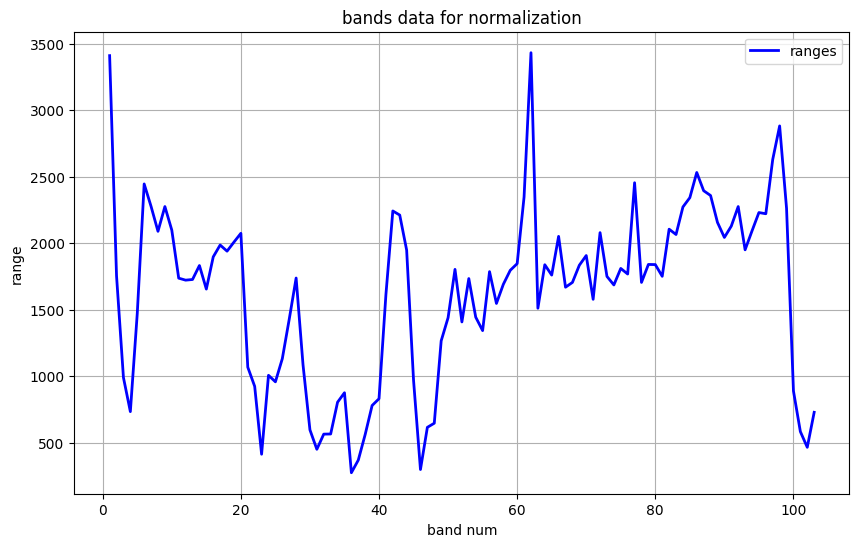

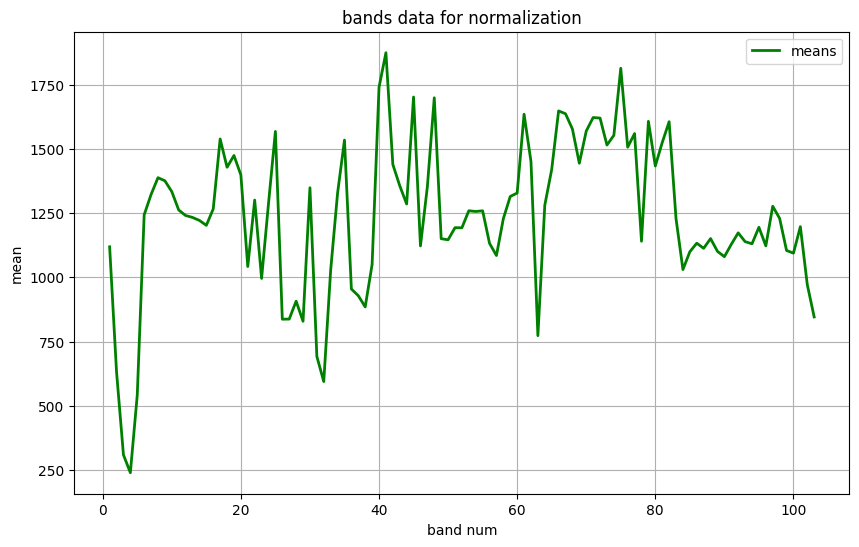

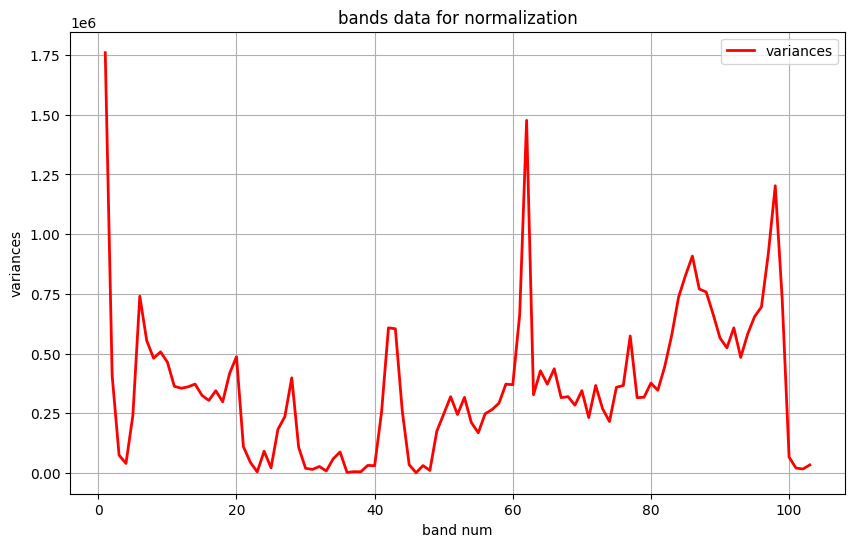

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
bands = np.arange(1, 104)  # Array from 1 to 103 (inclusive)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size (width, height)

plt.plot(bands, ranges, label='ranges', color='blue', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('band num')
plt.ylabel('range')
plt.title('bands data for normalization')
plt.legend()  # Show legend based on labels

# Show plot
plt.grid(True)  # Show grid
plt.show()


plt.figure(figsize=(10, 6))  # Adjust figure size (width, height)

plt.plot(bands, means, label='means', color='green', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('band num')
plt.ylabel('mean')
plt.title('bands data for normalization')
plt.legend()  # Show legend based on labels

# Show plot
plt.grid(True)  # Show grid
plt.show()


plt.figure(figsize=(10, 6))  # Adjust figure size (width, height)

plt.plot(bands, vars, label='variances', color='red', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('band num')
plt.ylabel('variances')
plt.title('bands data for normalization')
plt.legend()  # Show legend based on labels

# Show plot
plt.grid(True)  # Show grid
plt.show()